In [46]:
from glob import glob
import pandas as pd
import os
csv_list=glob(r'C:\\Users\\bluecom013\\Desktop\\class\\ignore\\데이터_분석을_위한_전처리와_시각화_with_파이썬_예제_및_연습_문제\\5장\\*.*')

data = csv_list[-3]

df = pd.read_csv(data)
col = df.columns
#print(type(col)) #<class 'pandas.core.indexes.base.Index'> , series 데이터 col.index('temp') 불가 - not list
df.head
df.iloc[:3,[1,3]]
df[['temp','mean_wind'][:3]]

df.info

['C:\\\\Users\\\\bluecom013\\\\Desktop\\\\class\\\\ignore\\\\데이터_분석을_위한_전처리와_시각화_with_파이썬_예제_및_연습_문제\\\\5장\\bank.csv', 'C:\\\\Users\\\\bluecom013\\\\Desktop\\\\class\\\\ignore\\\\데이터_분석을_위한_전처리와_시각화_with_파이썬_예제_및_연습_문제\\\\5장\\code.xlsx', 'C:\\\\Users\\\\bluecom013\\\\Desktop\\\\class\\\\ignore\\\\데이터_분석을_위한_전처리와_시각화_with_파이썬_예제_및_연습_문제\\\\5장\\covid.csv', 'C:\\\\Users\\\\bluecom013\\\\Desktop\\\\class\\\\ignore\\\\데이터_분석을_위한_전처리와_시각화_with_파이썬_예제_및_연습_문제\\\\5장\\covid19.csv', 'C:\\\\Users\\\\bluecom013\\\\Desktop\\\\class\\\\ignore\\\\데이터_분석을_위한_전처리와_시각화_with_파이썬_예제_및_연습_문제\\\\5장\\dust1.xlsx', 'C:\\\\Users\\\\bluecom013\\\\Desktop\\\\class\\\\ignore\\\\데이터_분석을_위한_전처리와_시각화_with_파이썬_예제_및_연습_문제\\\\5장\\mobile.csv', 'C:\\\\Users\\\\bluecom013\\\\Desktop\\\\class\\\\ignore\\\\데이터_분석을_위한_전처리와_시각화_with_파이썬_예제_및_연습_문제\\\\5장\\nation.xlsx', 'C:\\\\Users\\\\bluecom013\\\\Desktop\\\\class\\\\ignore\\\\데이터_분석을_위한_전처리와_시각화_with_파이썬_예제_및_연습_문제\\\\5장\\professor.csv', 'C:\\\\Users\\\\bluecom013\\\\Desktop\

<bound method DataFrame.info of             date  temp  max_wind  mean_wind
0     2010-08-01  28.7       8.3        3.4
1     2010-08-02  25.2       8.7        3.8
2     2010-08-03  22.1       6.3        2.9
3     2010-08-04  25.3       6.6        4.2
4     2010-08-05  27.2       9.1        5.6
...          ...   ...       ...        ...
3648  2020-07-27  22.1       4.2        1.7
3649  2020-07-28  21.9       4.5        1.6
3650  2020-07-29  21.6       3.2        1.0
3651  2020-07-30  22.9       9.7        2.4
3652  2020-07-31  25.7       4.8        2.5

[3653 rows x 4 columns]>

In [25]:
df.describe() #숫자자료만 기술통계
df[['max_wind,mean_wind']].describe()

KeyError: "None of [Index(['max_wind,mean_wind'], dtype='object')] are in the [columns]"

In [22]:
dfDescribe=df.describe(
)
dfDescribe.iloc[[1,5],:]

,temp,max_wind,mean_wind
mean,12.942102,7.911099,3.936441
50%,13.800000,7.600000,3.600000


In [23]:
dfDescribe.T

,count,mean,std,min,25%,50%,75%,max
temp,3653.0,12.942102,8.538507,-9.0,5.4,13.8,20.1,31.3
max_wind,3649.0,7.911099,3.029862,2.0,5.7,7.6,9.7,26.0
mean_wind,3647.0,3.936441,1.888473,0.2,2.5,3.6,5.0,14.9


<BarContainer object of 7 artists>

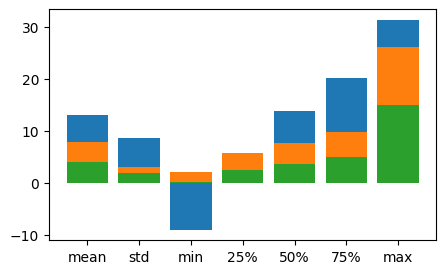

In [45]:
plt.figure(figsize=(5,3))
plt.bar(dfDescribe.index[1:],dfDescribe['temp'][1:])
plt.bar(dfDescribe.index[1:],dfDescribe['max_wind'][1:])
plt.bar(dfDescribe.index[1:],dfDescribe['mean_wind'][1:])

#plt.show()

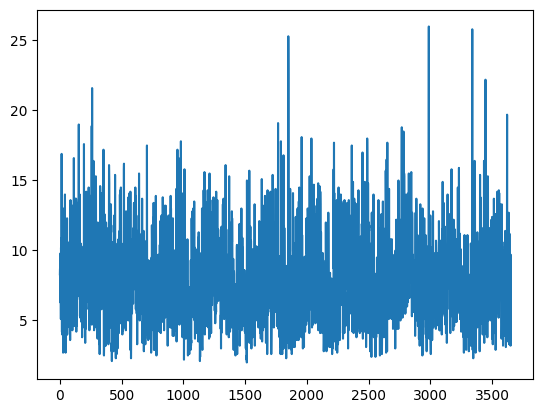

In [27]:
import matplotlib.pyplot as plt
plt.plot(df['max_wind']) # x축 index 값 자동

In [87]:
bank = csv_list[0]
df = pd.read_csv(bank)
df.head()
df.sample()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7234 entries, 0 to 7233
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   job        7190 non-null   object
 1   education  6961 non-null   object
 2   balance    7234 non-null   int64 
 3   duration   7234 non-null   int64 
 4   y          7234 non-null   object
dtypes: int64(2), object(3)
memory usage: 282.7+ KB


job           44
education    273
balance        0
duration       0
y              0
dtype: int64

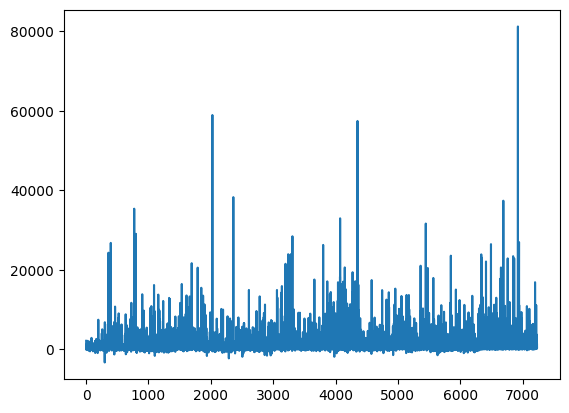

In [92]:
plt.plot(df['balance'])
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7234 entries, 0 to 7233
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   job        7190 non-null   object
 1   education  6961 non-null   object
 2   balance    7234 non-null   int64 
 3   duration   7234 non-null   int64 
 4   y          7234 non-null   object
dtypes: int64(2), object(3)
memory usage: 282.7+ KB


<Axes: >

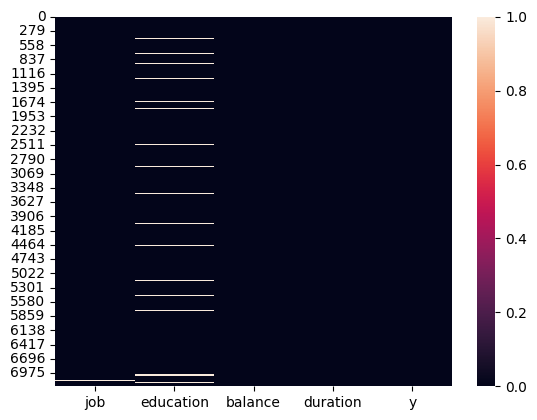

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

df.info()

sns.heatmap(df.isnull(), cbar=True)

<Axes: xlabel='y', ylabel='count'>

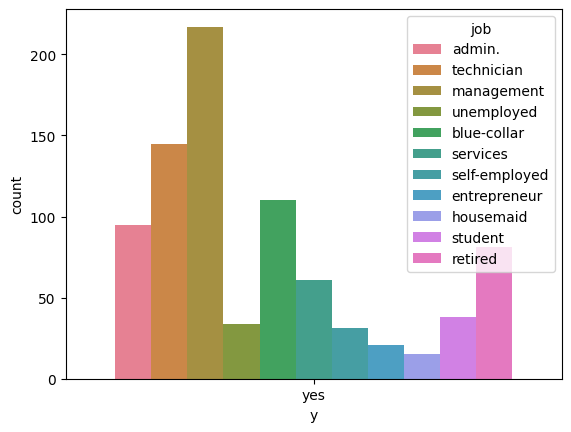

In [103]:
sns.countplot(data=df[df['y']=='yes'],x='y', hue='job')

<Axes: >

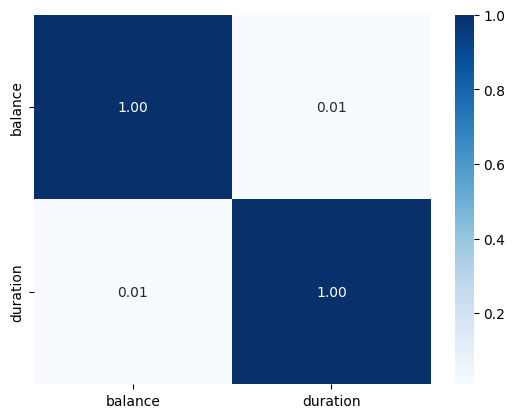

In [111]:
#피어슨 상관계수
df_corr = df[['balance','duration']].corr()

sns.heatmap(df_corr,annot=True,fmt=".2f", cmap="Blues")